<style>
* {
    font-family: consolas,'Microsoft YaHei';
}
p {
    line-height: 1.5em;
    font-size: 20px;
}
</style>
---
<center>
<h1>第九课</h1>
</center>

## **主题**：自然语言处理及常用分析库的介绍

<p>
上节课介绍了结构化数据的存储方案，所用到的数据都是结构化的，如二维表结构数据、键值结构数据以及网状结构数据，今天这次课主要了解一下非结构化的数据—文本型数据。

本节课的内容主要是有关自然语言的处理，涉及面几块内容：
</p>

## 纲要
### 1. 什么是自然语言处理
### 2. 结巴中文分词入门介绍
### 3. 案例分析——《三体Ⅱ黑暗森林》情感分析
### 4. 案例分析——电商产品评论数据情感分析
### 5. NLTK的安装与使用
---

<center><img src="../image/dinggroup.jpg" /></center>
<center><h2>1. 什么是自然语言处理</h2></center>


<p>
自然语言处理（Natural Language Processing，简称 NLP）是研究计算机处理人类语言的一门技术。随着深度学习在图像识别、语音识别领域的大放异彩，人们对深度学习在 NLP 的价值也寄予厚望。再加上 AlphaGo 的成功，人工智能的研究和应用变得炙手可热。自然语言处理作为人工智能领域的认知智能，成为目前大家关注的焦点。NLP 研究领域包括：
</p>

<p>
<b>1. 句法语义分析</b>：对于给定的句子，进行分词、词性标记、命名实体识别和链接、句法分析、语义角色识别和多义词消歧。
</p>
<p>
<b>2. 信息抽取</b>：从给定文本中抽取重要的信息，比如，时间、地点、人物、事件、原因、结果、数字、日期、货币、专有名词等等。通俗说来，就是要了解谁在什么时候、什么原因、对谁、做了什么事、有什么结果。涉及到实体识别、时间抽取、因果关系抽取等关键技术。
</p>
<p>
<b>3. 文本挖掘（或者文本数据挖掘）</b>：包括文本聚类、分类、信息抽取、摘要、情感分析以及对挖掘的信息和知识的可视化、交互式的表达界面。目前主流的技术都是基于统计机器学习的。
</p>
<p>
<b>4. 机器翻译</b>：把输入的源语言文本通过自动翻译获得另外一种语言的文本。根据输入媒介不同，可以细分为文本翻译、语音翻译、手语翻译、图形翻译等。机器翻译从最早的基于规则的方法到二十年前的基于统计的方法，再到今天的基于神经网络（编码-解码）的方法，逐渐形成了一套比较严谨的方法体系。
</p>
<p>
<b>5. 信息检索</b>：对大规模的文档进行索引。可简单对文档中的词汇，赋之以不同的权重来建立索引，也可利用 1，2，3 的技术来建立更加深层的索引。在查询的时候，对输入的查询表达式比如一个检索词或者一个句子进行分析，然后在索引里面查找匹配的候选文档，再根据一个排序机制把候选文档排序，最后输出排序得分最高的文档。
</p>
<p>
<b>6. 问答系统</b>： 对一个自然语言表达的问题，由问答系统给出一个精准的答案。需要对自然语言查询语句进行某种程度的语义分析，包括实体链接、关系识别，形成逻辑表达式，然后到知识库中查找可能的候选答案并通过一个排序机制找出最佳的答案。
</p>
<p>
<b>7. 对话系统</b>：系统通过一系列的对话，跟用户进行聊天、回答、完成某一项任务。涉及到用户意图理解、通用聊天引擎、问答引擎、对话管理等技术。此外，为了体现上下文相关，要具备多轮对话能力。同时，为了体现个性化，要开发用户画像以及基于用户画像的个性化回复。
</p>

> ——微软亚洲研究院首席研究员周明博士

<p>
我们这次课重点关注简单的句法语义分析过程。
</p>



<center><h2>2. 结巴中文分词入门介绍</h2></center>

结巴分词是[github](https://github.com/fxsjy/jieba)开源的中文分词项目。具有以下特点：

   - <p>支持三种分词模式：</p>

        - <p>精确模式，试图将句子最精确地切开，适合文本分析；</p>
        - <p>全模式，把句子中所有的可以成词的词语都扫描出来，速度非常快，但是不能解决歧义；</p>
        - <p>搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。</p>
        - <p>paddle模式，利用PaddlePaddle深度学习框架，训练序列标注（双向GRU）网络模型实现分词。</p>
   - <p>支持繁体分词</p>
   - <p>支持自定义词典</p>

<p>同时，它使用了如下算法：</p>

   - <p>基于前缀词典实现高效的词图扫描，生成句子中汉字所有可能成词情况所构成的有向无环图 (DAG)</p>
   - <p>采用了动态规划查找最大概率路径，找出基于词频的最大切分组合</p>
   - <p>对于未登录词，采用了基于汉字成词能力的 HMM 模型，使用了 Viterbi 算法</p>



In [2]:
import snownlp
import jieba
import jieba.analyse
import jieba.posseg as pseg
import re
import wordcloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

'''
关键词提取
    1. 词频统计、降序排序
    2. 人工去停用词
'''
def freq_word(words, rank):
    word_freq = {}
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    freq_word = []
    for word, freq in word_freq.items():
        freq_word.append((word, freq))
    freq_word.sort(key=lambda x: x[1], reverse=True)
    result = []
    for word, freq in freq_word[: rank]:
        result.append({word, freq})
    return result

stopwords = []
with open("stop_words.txt", encoding='utf-8', mode="r") as file:
    for word in file:
        stopwords.append(word.strip())

print(stopwords)
with open("谭德塞：使用疫苗结束新冠疫情有了真正的希望.txt", encoding='utf-8', mode="r") as file:
    raw = file.read().strip()
    article = re.compile('|'.join(stopwords)).sub('', raw)
    jieba.add_word('谭德塞')
    words = jieba.cut(article, cut_all=False)
    rank = int(input(u"请输入要获取前几位的高频词: "))
    print(freq_word(words, rank))
    jieba.analyse.set_stop_words('stop_words.txt')
    tags = jieba.analyse.extract_tags(raw, topK=rank)
    print(",".join(tags))


with open("谭德塞：使用疫苗结束新冠疫情有了真正的希望.txt", encoding='utf-8', mode="r") as file:
    text = file.read()
    print('3. 关键词提取')
    print('-'*40)
    print(' TF-IDF')
    print('-'*40)
    for x, w in jieba.analyse.extract_tags(text, withWeight=True):
        print('%s %s' % (x, w))

    print('-'*40)
    print(' TextRank')
    print('-'*40)

    for x, w in jieba.analyse.textrank(text, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v')):
        print('%s %s' % (x, w))


'''
jieba.cut主要有三种模式
'''
raw = '真是好久好久没来哈皮娜拉野生动物园了，记忆里还是小时候三四年级学校组织春游去的银河系'
# 全模式cut_all=True
text = jieba.lcut(raw, cut_all=True)
print('全模式分词：{ %d}' % len(text))
print("/".join(text))
print('='*30)

# 精准模式cut_all=False，默认即是
text = jieba.lcut(raw, cut_all=False)
print('精准模式分词：{ %d}' % len(text))
print("/".join(text))
print('='*30)

# 搜索引擎模式  cut_for_search
text = jieba.lcut_for_search(raw)
print('搜索引擎分词：{ %d}' % len(text))
print("/".join(text))
print('='*30)

print('总词数{}'.format(len(jieba.lcut(raw))))
text = jieba.analyse.extract_tags(raw)
print('关键词提取:', "/".join(text))
text = jieba.analyse.extract_tags(raw, topK=3)
print('关键词 top 3:', "/".join(text))
print('='*30)

text = jieba.lcut(raw, cut_all=False)
print('原始分词: ', "/".join(text))
jieba.add_word('哈皮娜拉')
text = jieba.lcut(raw, cut_all=False)
print('add_word添加自定义词后: ', "/".join(text))
jieba.suggest_freq('野生动物园', tune=True)
text = jieba.lcut(raw, cut_all=False)
print('suggest_freq修正词频后: ', "/".join(text))
jieba.load_userdict('userdict.txt')
text = jieba.lcut(raw, cut_all=False)
print('load_userdict使用词典后:'+"/".join(text))

'''
词典格式：
  一词一行: 词语 词频（可省略） 词性（可省略）——（空格分隔，顺序固定，UTF-8编码）
'''

# cut返回一个generator生成器，lcut返回一个list

'''
词性标注
'''
words = pseg.cut('我爱美丽的北京天安门')
for word, flag in words:
    print('%s %s' % (word, flag))

result = jieba.tokenize(u'永和服装饰品有限公司')
for tk in result:
    print('word %s\t start: %d \t end:%d' % (tk[0], tk[1], tk[2]))

'''
自定义语料库
'''
# jieba.analyse.set_idf_path(file_name)

'''
自定义分词器
'''
# jieba.posseg.POSTokenizer(tokenizer=None)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Vector\AppData\Local\Temp\jieba.cache
['“', '”', '，', '。', '、', '\\n', '的', '在', '和']
Loading model cost 0.662 seconds.
Prefix dict has been built successfully.
[{'疫苗', 14}, {8, '新冠'}, {'全球', 4}, {4, '谭德塞'}, {'研发', 4}]
疫苗,新冠,谭德塞,研发,23
3. 关键词提取
----------------------------------------
 TF-IDF
----------------------------------------
疫苗 0.5259356499868394
新冠 0.49553440426528494
谭德塞 0.24776720213264247
研发 0.14047276670217618
23 0.12388360106632124
世卫 0.1088029043554404
获取 0.10753080156233161
记者会 0.10582174298341969
全球 0.10159681769305699
紧迫性 0.10017172173450777
加速器 0.0931401322926425
倡议 0.08708299924020725
合作 0.08564344332326425
疫情 0.08379841575284974
疗法 0.0831683618768912
公平 0.07421078781989637
国际 0.06953178965300519
采购 0.06893444123948186
国家 0.062183088997305694
11 0.06194180053316062
----------------------------------------
 TextRank
----------------------------------------
疫苗 1.0
新冠 0.72684230816494

'\n自定义分词器\n'

<center><h2>3. 案例分析——《三体Ⅱ黑暗森林》情感分析</h2></center>

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Vector\AppData\Local\Temp\jieba.cache
Loading model cost 0.736 seconds.
Prefix dict has been built successfully.
开始进行情感分析，请稍等，大概需要两分钟左右


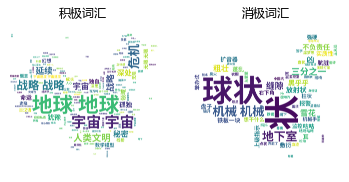

In [2]:
import snownlp
import jieba
import jieba.analyse
import jieba.posseg as pseg
import re
import wordcloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

mk = np.array(Image.open('../image/china.jpg'))

# 构建并配置两个词云对象w1和w2，分别存放积极词和消极词
w1 = wordcloud.WordCloud(width=820,
                         height=820,
                         background_color='white',
                         font_path='SourceHanSansSC-Bold.otf',
                         mask=mk,
                         scale=4)
w2 = wordcloud.WordCloud(width=820,
                         height=820,
                         background_color='white',
                         font_path='SourceHanSansSC-Bold.otf',
                         mask=mk,
                         scale=4)

# 对来自外部文件的文本进行中文分词，得到积极词汇和消极词汇的两个列表
f = open('三体黑暗森林.txt', encoding='utf-8')
txt = f.read()
txtlist = jieba.lcut(txt)
positivelist = []
negativelist = []

# 下面对文本中的每个词进行情感分析，情感>0.96判为积极词，情感<0.06判为消极词
print('开始进行情感分析，请稍等，大概需要两分钟左右')
# 导入自然语言处理第三方库snownlp
for each in txtlist:
    each_word = snownlp.SnowNLP(each)
    feeling = each_word.sentiments
    if feeling > 0.96:
        positivelist.append(each)
    elif feeling < 0.06:
        negativelist.append(each)
    else:
        pass
# 将积极和消极的两个列表各自合并成积极字符串和消极字符串，字符串中的词用空格分隔
positive_string = " ".join(positivelist)
negative_string = " ".join(negativelist)

# 将string变量传入w的generate()方法，给词云输入文字
w1.generate(positive_string)
w2.generate(negative_string)

# 将积极、消极的两个词云图片导出到当前文件夹
w1.to_file('positive.png')
w2.to_file('negative.png')
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.facecolor'] = '#E5E5E5'
plt.subplot(121)
plt.imshow(w1, interpolation="bilinear")
plt.title('积极词汇')
plt.axis('off')
plt.subplot(122)
plt.imshow(w2, interpolation="bilinear")
plt.title('消极词汇')
plt.axis('off')
f.close()

<center><h2>4. 案例分析——电商产品评论数据情感分析</h2></center>

<p>
由于每个阶段的数据文件存在依赖关系，所以这里输出保存在了data/目录下。下面是该案例分析的五个过程，它们分别对应了代码实现中的五个函数：
</p>

- <p>
programmer_1-->提取数据
</p>
- <p>
programmer_2-->数据去重
</p>
- <p>
programmer_3-->利用正则去除一些数据
</p>
- <p>
programmer_4-->使用jieba分词
</p>
- <p>
programmer_5-->分词之后的语义分析，LDA模型分析正面负面情感
</p>



In [6]:

import jieba
import jieba.analyse
import pandas as pd
from gensim import corpora, models


def programmer_1():
    inputfile = "data/huizong.csv"
    outputfile = "data/meidi_jd.txt"
    data = pd.read_csv(inputfile, encoding="utf-8")
    data = data[[u"评论"]][data[u"品牌"] == u"美的"]
    data.to_csv(outputfile, index=False, header=False, encoding="utf8")


def programmer_2():
    inputfile = "data/meidi_jd.txt"
    outputfile = "data/meidi_jd_process_1.txt"
    data = pd.read_csv(inputfile, encoding="utf8", header=None)
    l1 = len(data)
    data = pd.DataFrame(data[0].unique())
    l2 = len(data)
    data.to_csv(outputfile, index=False, header=False, encoding="utf8")
    print(u"删除了%s条评论" % (l1 - l2))


def programmer_3():
    inputfile1 = u"data/meidi_jd_process_end_负面情感结果.txt"
    inputfile2 = u"data/meidi_jd_process_end_正面情感结果.txt"
    outputfile1 = "data/meidi_jd_neg.txt"
    outputfile2 = "data/meidi_jd_pos.txt"

    data1 = pd.read_csv(inputfile1, encoding="utf8", header=None)
    data2 = pd.read_csv(inputfile2, encoding="utf8", header=None)

    data1 = pd.DataFrame(data1[0].str.replace(".*?\d+?\\t ", ""))
    data2 = pd.DataFrame(data2[0].str.replace(".*?\d+?\\t ", ""))

    data1.to_csv(outputfile1, index=False, header=False, encoding="utf8")
    data2.to_csv(outputfile2, index=False, header=False, encoding="utf8")


def programmer_4():

    inputfile1 = "data/meidi_jd_neg.txt"
    inputfile2 = "data/meidi_jd_pos.txt"
    outputfile1 = "data/meidi_jd_neg_cut.txt"
    outputfile2 = "data/meidi_jd_pos_cut.txt"

    data1 = pd.read_csv(inputfile1, encoding="utf8", header=None)
    data2 = pd.read_csv(inputfile2, encoding="utf8", header=None)

    def mycut(s): return " ".join(jieba.cut(s))

    data1 = data1[0].apply(mycut)
    data2 = data2[0].apply(mycut)

    data1.to_csv(outputfile1, index=False, header=False, encoding="utf8")
    data2.to_csv(outputfile2, index=False, header=False, encoding="utf8")


def programmer_5():
    negfile = "data/meidi_jd_neg_cut.txt"
    posfile = "data/meidi_jd_pos_cut.txt"
    stoplist = "data/stoplist.txt"

    neg = pd.read_csv(negfile, encoding="utf8", header=None)
    pos = pd.read_csv(posfile, encoding="utf8", header=None)
    """
    sep设置分割词，由于csv默认半角逗号为分割词，而且该词恰好位于停用词表中
    所以会导致读取错误
    解决办法是手动设置一个不存在的分割词，这里使用的是tipdm
    参数engine加上，指定引擎，避免警告
    """
    stop = pd.read_csv(stoplist, encoding="utf8",
                       header=None, sep="tipdm", engine="python")

    # pandas自动过滤了空格，这里手动添加
    stop = [" ", ""] + list(stop[0])

    # 定义分割函数，然后用apply进行广播
    neg[1] = neg[0].apply(lambda s: s.split(" "))
    neg[2] = neg[1].apply(lambda x: [i for i in x if i not in stop])
    pos[1] = pos[0].apply(lambda s: s.split(" "))
    pos[2] = pos[1].apply(lambda x: [i for i in x if i not in stop])

    # 负面主题分析
    # 建立词典
    neg_dict = corpora.Dictionary(neg[2])
    # 建立语料库
    neg_corpus = [neg_dict.doc2bow(i) for i in neg[2]]
    # LDA模型训练
    neg_lda = models.LdaModel(neg_corpus, num_topics=3, id2word=neg_dict)

    for i in range(3):
        print(neg_lda.print_topic(i))

    # 正面主题分析
    # 以下同上
    pos_dict = corpora.Dictionary(pos[2])
    pos_corpus = [pos_dict.doc2bow(i) for i in pos[2]]
    pos_lda = models.LdaModel(pos_corpus, num_topics=3, id2word=pos_dict)
    for i in range(3):
        print(pos_lda.print_topic(i))


if __name__ == "__main__":
    programmer_1()
    programmer_2()
    programmer_3()
    programmer_4()
    programmer_5()
    pass


删除了1191条评论
0.039*"安装" + 0.030*"买" + 0.016*"热水器" + 0.014*"师傅" + 0.014*"美的" + 0.013*"好" + 0.008*"安装费" + 0.007*"知道" + 0.007*"问题" + 0.007*"送货"
0.053*"安装" + 0.014*"京东" + 0.014*"热水器" + 0.011*"好" + 0.010*"买" + 0.010*"师傅" + 0.010*"一个" + 0.009*"服务" + 0.008*"东西" + 0.008*"不错"
0.031*"不错" + 0.025*"安装" + 0.019*"热水器" + 0.018*"加热" + 0.016*"好" + 0.014*"知道" + 0.010*"n" + 0.009*"速度" + 0.008*"买" + 0.008*"热水"
0.049*"不错" + 0.047*"好" + 0.044*"安装" + 0.028*"东西" + 0.019*"美的" + 0.016*"热水器" + 0.015*"买" + 0.014*"使用" + 0.012*"挺" + 0.012*"安装费"
0.071*"安装" + 0.057*"好" + 0.036*"师傅" + 0.033*"送货" + 0.025*"不错" + 0.024*"很快" + 0.022*"速度" + 0.020*"服务" + 0.019*"京东" + 0.014*"满意"
0.061*"不错" + 0.034*"好" + 0.030*"买" + 0.019*"加热" + 0.016*"价格" + 0.016*"高" + 0.015*"热水器" + 0.014*"便宜" + 0.014*"值得" + 0.013*"性价比"


<center><h2>5. NLTK的安装与使用</h2></center>

<p>NLTK 在使用 Python 处理自然语言的工具中处于领先的地位。它提供了超过 50 个包括如： WordNet 这种方便处理词汇资源的数据接口。同时，还有一套用于分类、标记化、词干标记、解析和语义推理的文本处理库，以及工业级 NLP 库的封装器。同时NLTK 是一个免费、开源的社区驱动的项目。</p>

<p>在使用NLTK库前，我们先在命令行窗口输入如下命令安装NLTK及其语料分析库：</p>


```bat
pip install NLTK
git clone https://github.com/nltk/nltk_data.git
```